<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Delhi/congressDelhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
!git clone https://github.com/raishagun/Election-Prediction.git

fatal: destination path 'Election-Prediction' already exists and is not an empty directory.


In [96]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"congress Delhi"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('congress_delhi.csv',index = False)

Streaming output truncated to the last 5000 lines.
331
687
0
<--------------------------------------------------->
613
2020-11-18 16:28:58
1329099289981820928
False
@INCIndia Baraf ki Salee Par Let Jao Saare @INCIndia 😂😂😂

63 out of 66 #Congress candidates Lose deposit https://t.co/lKgD7VnvFd
Keh_ke_Le_Lunga
in your face 
Twitter for Android
1
1953
1107
0
<--------------------------------------------------->
614
2020-11-18 16:20:31
1329097160797814784
False
@kgbadariprasad @AAPBangalore @AamAadmiParty @aapkaprithvi @AAP4KA @basavarajsm_ @Vikash_Shukla_ @CitizenKamran @romibhati @MohanDasari_ Air quality has improved by 25% in Delhi.
The huge problem created by crop stubble burning in states run by BJP and Congress (esp Punjab &amp; Haryana) - those govts have done *nothing* to solve the problem but Delhi govt has come up with a cost-effective bio-decomposer solution.
sumanvdeshpande

Twitter Web App
1
58
155
0
<--------------------------------------------------->
615
2020-11-18 16:14:5

In [97]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       955 non-null    datetime64[ns]
 1   Tweet_id   955 non-null    int64         
 2   Verified   955 non-null    bool          
 3   Tweet      955 non-null    object        
 4   User       955 non-null    object        
 5   Location   955 non-null    object        
 6   Source     955 non-null    object        
 7   Likes      955 non-null    int64         
 8   Followers  955 non-null    int64         
 9   Following  955 non-null    int64         
 10  Retweets   955 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 75.7+ KB


In [99]:
df.shape

(955, 11)

In [100]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [101]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [102]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [103]:
df['Source'].value_counts()

Twitter for Android               515
Twitter Web App                   237
Twitter for iPhone                112
TweetDeck                          35
Rajneeti News                       8
Twitter Media Studio - LiveCut      7
Blog2Social APP                     6
Twitter for iPad                    5
IFTTT                               4
cmssocialservice                    4
National Herald                     3
WordPress.com                       3
Twitter Media Studio                3
dlvr.it                             2
Hootsuite Inc.                      2
Hocalwire Social Share              2
infeedAutoPost                      1
Republicworld                       1
Isrg                                1
ht-twitter-handler                  1
Mobile Web (M2)                     1
econ b2b post                       1
SocialFlow                          1
Name: Source, dtype: int64

In [104]:
df['Location'].nunique()

255

In [105]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

955

In [106]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


948

In [107]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [108]:
df['Tweet'].duplicated().sum()

7

In [109]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(948, 11)

In [110]:
df['Tweet'].duplicated().sum()

0

In [111]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [112]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [113]:
df.shape

(948, 12)

In [114]:
df['Processed_Tweet']

0      Pappu Rahul Gandhi and Mother Sonia Gandhi esc...
1      Rajneeti News (4 ‘dissenters’ on Cong panels, ...
2      Rajneeti News (4 ‘dissenters’ on Cong panels, ...
3      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
4      @anandPriyank11 @DjKaran @SaketGokhale @rohini...
                             ...                        
943    @ANI If its EVM then how did congress won in P...
944    Muslims voted for the AAP in this year’s Delhi...
945    ARSHI EVERY AS RTY HAS THE RIGHT TO FIGHT ELEC...
946    @Rahulmi93134482 @Ch_AnilKumarINC Sir, Polluti...
947    @Ch_AnilKumarINC Things were completely differ...
Name: Processed_Tweet, Length: 948, dtype: object

In [115]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      Pappu Rahul Gandhi and Mother Sonia Gandhi esc...
1      Rajneeti News (4 ‘dissenters’ on Cong panels, ...
2      Rajneeti News (4 ‘dissenters’ on Cong panels, ...
3      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
4      @anandPriyank11 @DjKaran @SaketGokhale @rohini...
                             ...                        
943    @ANI If its EVM then how did congress won in P...
944    Muslims voted for the AAP in this year’s Delhi...
945    ARSHI EVERY AS RTY HAS THE RIGHT TO FIGHT ELEC...
946    @Rahulmi93134482 @Ch_AnilKumarINC Sir, Polluti...
947    @Ch_AnilKumarINC Things were completely differ...
Name: Processed_Tweet, Length: 948, dtype: object

In [116]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0      Pappu Rahul Gandhi and Mother Sonia Gandhi esc...
1      Rajneeti News (4 ‘dissenters’ on Cong panels, ...
2      Rajneeti News (4 ‘dissenters’ on Cong panels, ...
3      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
4              Seriously? Rahul Gandhi doesn't even s...
                             ...                        
943      If its EVM then how did congress won in Punj...
944    Muslims voted for the AAP in this year’s Delhi...
945    ARSHI EVERY AS RTY HAS THE RIGHT TO FIGHT ELEC...
946        Sir, Pollution is not BJP, AAP or Congress...
947      Things were completely different when Congre...
Name: Processed_Tweet, Length: 948, dtype: object

In [117]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0      Pappu Rahul Gandhi and Mother Sonia Gandhi esc...
1      Rajneeti News (4 ‘dissenters’ on Cong panels, ...
2      Rajneeti News (4 ‘dissenters’ on Cong panels, ...
3      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
4              Seriously? Rahul Gandhi doesn't even s...
                             ...                        
943      If its EVM then how did congress won in Punj...
944    Muslims voted for the AAP in this year’s Delhi...
945    ARSHI EVERY AS RTY HAS THE RIGHT TO FIGHT ELEC...
946        Sir, Pollution is not BJP, AAP or Congress...
947      Things were completely different when Congre...
Name: Processed_Tweet, Length: 948, dtype: object

In [118]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0      Pappu Rahul Gandhi and Mother Sonia Gandhi esc...
1      Rajneeti News (4 ‘dissenters’ on Cong panels, ...
2      Rajneeti News (4 ‘dissenters’ on Cong panels, ...
3      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
4              Seriously? Rahul Gandhi doesn't even s...
                             ...                        
943      If its EVM then how did congress won in Punj...
944    Muslims voted for the AAP in this year’s Delhi...
945    ARSHI EVERY AS RTY HAS THE RIGHT TO FIGHT ELEC...
946        Sir, Pollution is not BJP, AAP or Congress...
947      Things were completely different when Congre...
Name: Processed_Tweet, Length: 948, dtype: object

In [119]:
!pip install tweet-preprocessor

In [120]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      Pappu Rahul Gandhi and Mother Sonia Gandhi esc...
1      Rajneeti News (4 dissenters on Cong panels, Si...
2      Rajneeti News (4 dissenters on Cong panels, Si...
3      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
4      Seriously? Rahul Gandhi doesn't even stay in t...
                             ...                        
943    If its EVM then how did congress won in Punjab...
944    Muslims voted for the AAP in this years Delhi ...
945    ARSHI EVERY AS RTY HAS THE RIGHT TO FIGHT ELEC...
946    Sir, Pollution is not BJP, AAP or Congress its...
947    Things were completely different when Congress...
Name: Processed_Tweet, Length: 948, dtype: object

In [121]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      Pappu Rahul Gandhi and Mother Sonia Gandhi esc...
1      Rajneeti News    dissenters on Cong panels  Si...
2      Rajneeti News    dissenters on Cong panels  Si...
3      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
4      Seriously  Rahul Gandhi doesn t even stay in t...
                             ...                        
943    If its EVM then how did congress won in Punjab...
944    Muslims voted for the AAP in this years Delhi ...
945    ARSHI EVERY AS RTY HAS THE RIGHT TO FIGHT ELEC...
946    Sir  Pollution is not BJP  AAP or Congress its...
947    Things were completely different when Congress...
Name: Processed_Tweet, Length: 948, dtype: object

In [122]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      pappu rahul gandhi and mother sonia gandhi esc...
1      rajneeti news    dissenters on cong panels  si...
2      rajneeti news    dissenters on cong panels  si...
3      jo vote dene wala bhi hoga adhir chowdhary ko ...
4      seriously  rahul gandhi doesn t even stay in t...
                             ...                        
943    if its evm then how did congress won in punjab...
944    muslims voted for the aap in this years delhi ...
945    arshi every as rty has the right to fight elec...
946    sir  pollution is not bjp  aap or congress its...
947    things were completely different when congress...
Name: Processed_Tweet, Length: 948, dtype: object

In [123]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'dedicated to all bjp and congress delhi unit  who are crying for having rs as a fine after having no mask    '

In [124]:
df['User'].value_counts()

AnshulT81885785    49
Supriya23bh        11
RajneetiNews        8
Mosarra30650416     7
thefirstindia       6
                   ..
Kishlaysharma       1
_Aniket             1
PrakashWKamatPK     1
the_news_21         1
neeraj_congress     1
Name: User, Length: 737, dtype: int64

In [125]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


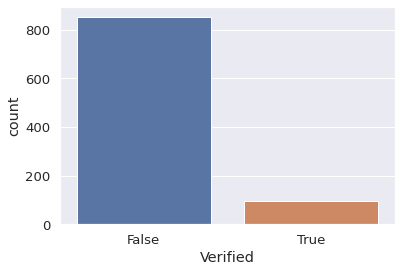

In [126]:
bar = sns.countplot(df['Verified'])

In [127]:
df['Verified'].value_counts()

False    852
True      96
Name: Verified, dtype: int64

In [128]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

ANI                5
htTweets           5
IndiaToday         5
NewsMobileIndia    5
TimesNow           5
MirrorNow          3
NH_India           3
DelhiPYC           3
ians_india         3
IndianExpress      2
TheDailyPioneer    2
JantaKaReporter    2
OpIndia_com        2
the_hindu          2
Sootradhar         2
TOIDelhi           2
EconomicTimes      2
NewIndianXpress    2
PBNS_India         2
TOICitiesNews      2
AmanKayamHai_ET    1
ThePrintIndia      1
INCDelhi           1
dt_next            1
mudit_aggarwal     1
ANINewsUP          1
aartic02           1
MomentsIndia       1
htdelhi            1
RavindraGautam_    1
timesofindia       1
ahmedabadmirror    1
Outlookindia       1
DeccanHerald       1
Aagan86            1
Oneindia           1
AkshayMarathe      1
brfreed            1
JagranEnglish      1
thenewsminute      1
jgopikrishnan70    1
NewsroomPostCom    1
indiatvnews        1
GetNewsd           1
republic           1
SanjaySDutt        1
SheThePeople       1
ttindia      

In [129]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 56, 16: 111, 17: 97, 18: 108, 19: 201, 20: 255, 21: 120})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

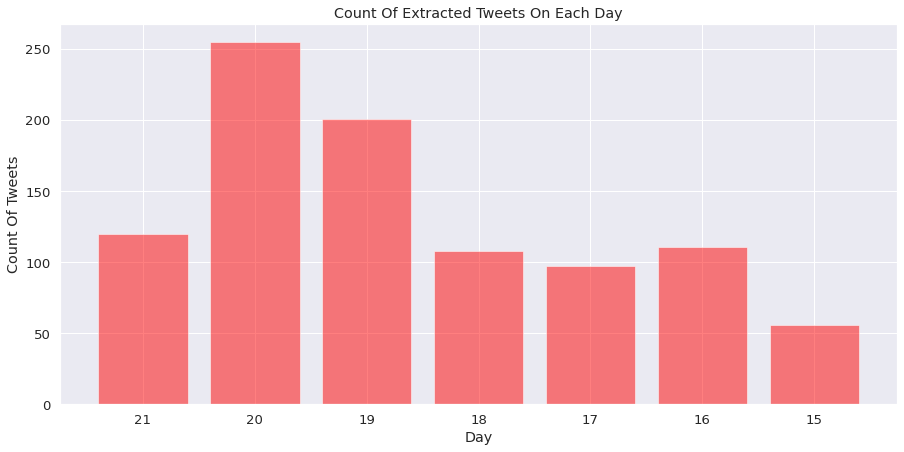

In [130]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [131]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 8,
         1: 16,
         2: 42,
         3: 47,
         4: 64,
         5: 67,
         6: 29,
         7: 42,
         8: 41,
         9: 49,
         10: 34,
         11: 69,
         12: 44,
         13: 51,
         14: 51,
         15: 50,
         16: 51,
         17: 56,
         18: 38,
         19: 62,
         20: 18,
         21: 8,
         22: 4,
         23: 7})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

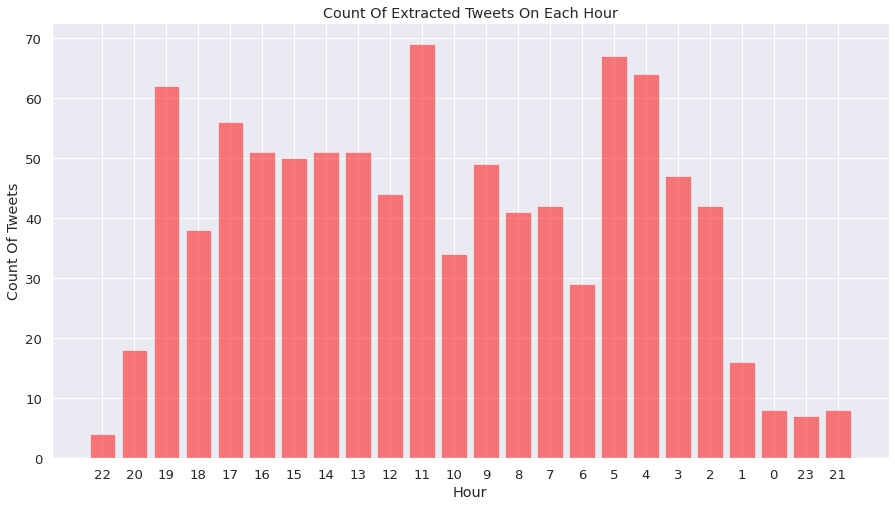

In [132]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [133]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [134]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['above', 'were', 'do', 'any', 'off', 'them', 'have', 'most', "didn't", 'between', 'during', 'where', 'down', "couldn't", "shan't", 'under', "don't", 'didn', 'if', 'am', 'is', 'about', 'its', 'been', 'more', 'needn', 'hers', "that'll", 'nor', 'their', "needn't", 'doing', 'your', 'whom', 'haven', 'because', 'both', 'yours', 'but', 'such', 'weren', 'she', 'yourself', 'theirs', 'from', 'had', 'our', 'couldn', 'shan', 'into', 'ourselves', 'each', 'here', 'did', "mustn't", 'yourselves', 'by', 'can', "it's", "doesn't", 'd', 'me', 'are', 'you', "won't", 'in', 'doesn', "haven't", 'ma', 'm', 'having', 'own', 'he', 'some', 'only', 'so', 'his', 'does', 'after', "aren't", "you'll", 'wouldn', 'very', 'the', 'at', 'we', 's', "should've", 'of', 'a', 'was', 'not', 'as', 'won', 'through', 'itself', 'they', 'until', 'it', 'against', 'no', "wasn't", 're', 'for', 'to', 'be', 'myself', 'who', 'him', 'too', 'below', 'and', 'now', "she's", 'hadn', 'o', 'aren', 'mustn', 'i', 'then', 'or', "isn't", 'with', 'fu

In [136]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      pappu rahul gandhi mother sonia gandhi escaped...
1      rajneeti news dissenters cong panels sibal lef...
2      rajneeti news dissenters cong panels sibal lef...
3      jo vote dene wala bhi hoga adhir chowdhary ko ...
4      seriously rahul gandhi even stay house mother ...
                             ...                        
943             evm congress punjab maharastra aap delhi
944    muslims voted aap years delhi assembly electio...
945    arshi every rty right fight elections cannot b...
946    sir pollution bjp aap congress one else live d...
947    things completely different congress leading d...
Name: Processed_Tweet, Length: 948, dtype: object

In [137]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [pappu, rahul, gandhi, mother, sonia, gandhi, ...
1      [rajneeti, news, dissenters, cong, panels, sib...
2      [rajneeti, news, dissenters, cong, panels, sib...
3      [jo, vote, dene, wala, bhi, hoga, adhir, chowd...
4      [seriously, rahul, gandhi, even, stay, house, ...
                             ...                        
943      [evm, congress, punjab, maharastra, aap, delhi]
944    [muslims, voted, aap, years, delhi, assembly, ...
945    [arshi, every, rty, right, fight, elections, c...
946    [sir, pollution, bjp, aap, congress, one, else...
947    [things, completely, different, congress, lead...
Name: Processed_Tweet, Length: 948, dtype: object

In [138]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [pappu, rahul, gandhi, mother, sonia, gandhi, ...
1      [rajneeti, news, dissent, cong, panel, sibal, ...
2      [rajneeti, news, dissent, cong, panel, sibal, ...
3      [jo, vote, dene, wala, bhi, hoga, adhir, chowd...
4      [serious, rahul, gandhi, even, stay, hous, mot...
                             ...                        
943      [evm, congress, punjab, maharastra, aap, delhi]
944    [muslim, vote, aap, year, delhi, assembl, elec...
945    [arshi, everi, rti, right, fight, elect, canno...
946    [sir, pollut, bjp, aap, congress, one, els, li...
947    [thing, complet, differ, congress, lead, delhi...
Name: Processed_Tweet, Length: 948, dtype: object

In [139]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 22:34:11,1330278362485493761,False,Pappu Rahul Gandhi and Mother Sonia Gandhi esc...,robbervadra3,India,Twitter for Android,0,16,567,0,"[pappu, rahul, gandhi, mother, sonia, gandhi, ..."
1,2020-11-21 20:16:15,1330243649146396676,False,"Rajneeti News (4 ‘dissenters’ on Cong panels, ...",RajneetiNews,New Delhi,Rajneeti News,0,553,277,0,"[rajneeti, news, dissent, cong, panel, sibal, ..."
2,2020-11-21 19:55:36,1330238452521197570,False,"Rajneeti News (4 ‘dissenters’ on Cong panels, ...",RajneetiNews,New Delhi,Rajneeti News,0,553,277,0,"[rajneeti, news, dissent, cong, panel, sibal, ..."
3,2020-11-21 19:19:22,1330229333860954119,False,Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...,JharkhandVikas,Ranchi l New Delhi l Kolkata,Twitter for iPhone,0,901,234,0,"[vote, dene, wala, bhi, hoga, adhir, chowdhari..."
4,2020-11-21 19:08:04,1330226489279848448,False,@anandPriyank11 @DjKaran @SaketGokhale @rohini...,VM13277460,,Twitter for Android,0,15,56,0,"[serious, rahul, gandhi, even, stay, hous, mot..."
...,...,...,...,...,...,...,...,...,...,...,...,...
943,2020-11-15 14:06:52,1327976364222205952,False,@ANI If its EVM then how did congress won in P...,iamGAK4,"Mumbai, India",Twitter for iPhone,0,114,153,0,"[evm, congress, punjab, maharastra, aap, delhi]"
944,2020-11-15 14:04:40,1327975811446542337,False,Muslims voted for the AAP in this year’s Delhi...,goldenarcher,Animal Farm,Twitter for Android,1,1763,73,0,"[muslim, vote, aap, year, delhi, assembl, elec..."
945,2020-11-15 13:41:27,1327969968546217984,False,ARSHI EVERY AS RTY HAS THE RIGHT TO FIGHT ELEC...,zubair_sbl,"Maharashtra, India",Twitter for Android,0,1592,1745,0,"[arshi, everi, rti, right, fight, elect, canno..."
946,2020-11-15 12:58:59,1327959279865712641,False,"@Rahulmi93134482 @Ch_AnilKumarINC Sir, Polluti...",nitinagrawal911,new delhi,Twitter Web App,0,24,39,0,"[sir, pollut, bjp, aap, congress, one, els, li..."


In [140]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

17996

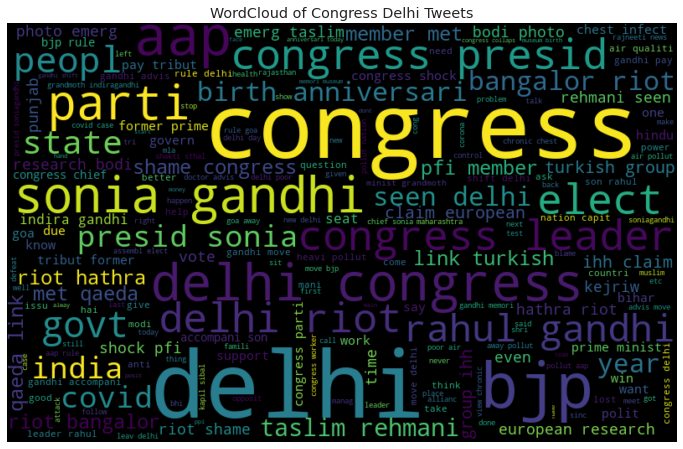

In [141]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Congress Delhi Tweets")
plt.show()

In [142]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

948

In [143]:
len(text)

17996

In [144]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 342
Negative Tweets: 171
Neutral Tweets 435


In [145]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [146]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [147]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.140,0.860,0.000,-0.4767
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.088,0.912,0.000,-0.4019
4,0.053,0.947,0.000,-0.0772
...,...,...,...,...
943,0.000,1.000,0.000,0.0000
944,0.000,0.625,0.375,0.8225
945,0.120,0.786,0.094,-0.1441
946,0.150,0.778,0.072,-0.3400


In [148]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.140,0.860,0.0,-0.4767,Negative
1,0.000,1.000,0.0,0.0000,Neutral
2,0.000,1.000,0.0,0.0000,Neutral
3,0.088,0.912,0.0,-0.4019,Negative
4,0.053,0.947,0.0,-0.0772,Negative


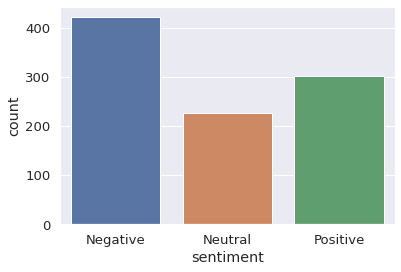

In [149]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [150]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Delhi/congress_delhi.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

1842

In [151]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [153]:
word_emotion=dict()
for i in range(0,1842):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,3346):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

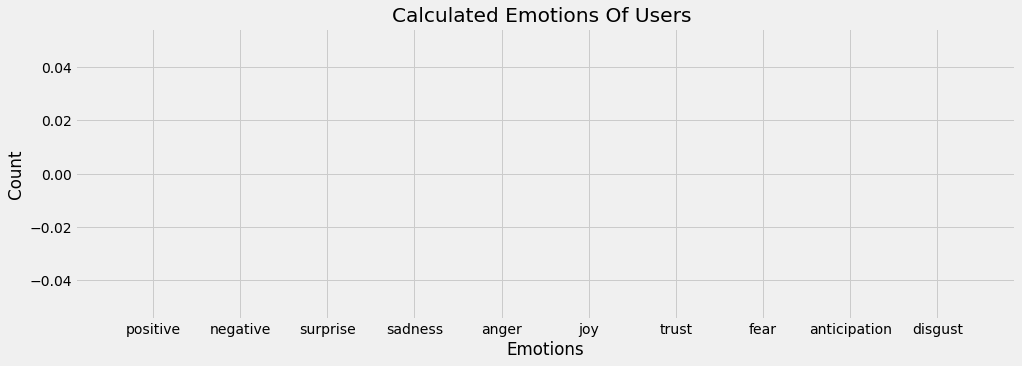

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [ ]:
df.Location  = df.Location.fillna('USA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [ ]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                     197
India                 61
New Delhi, India      18
Worldwide             14
Chandigarh, India     13
                    ... 
Arrakis                1
INDIA                  1
Hindustan              1
✨                      1
Phagwara, Punjab       1
Name: Location, Length: 205, dtype: int64

In [ ]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 23:17:54,1330289363549360128,False,@NarinderKaurAAP @BhagwantMann @AAPPunjab @Jar...,CrusaderSingh22,London,Twitter for iPhone,0,64,55,0,"[quit, shock, note, aap, continu, super, sprea...",London
1,2020-11-21 22:58:42,1330284530964570114,False,@Dubai_Indian_1 @TimesNow @Dev_Fadnavis Don't ...,mianmuhmmad1,"Lahore, Pakistan",Twitter for Android,4,88,276,0,"[angre, live, let, live, purani, lahor, darwaz...",Lahore
2,2020-11-21 21:53:53,1330268221220548615,False,AAP as party in delhi correct may be ! But In ...,GodyalNagaraj,"Andhra Pradesh,India",Twitter Web App,0,48,3239,0,"[aap, parti, delhi, correct, may, karnataka, h...",Andhra Pradesh
3,2020-11-21 20:18:17,1330244160499175427,False,@yudii222 @CMODelhi @ArvindKejriwal @Satyendar...,LAutreGarcon,"New Delhi, India",Twitter for Android,0,98,233,0,"[would, still, vote, aap, peopl, delhi, see, r...",New Delhi
4,2020-11-21 19:55:02,1330238309461872642,False,@ExSecular It’s almost the time AAP is going t...,SadanandSudeer,,Twitter for iPhone,2,53,225,0,"[almost, time, aap, come, conspiraci, theori, ...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,2020-11-15 12:38:24,1327954100827336704,False,@vijaythottathil @Riyadenny He just cheat us w...,jaison3012,"New Delhi, India",Twitter Web App,2,82,415,0,"[cheat, hidden, agenda, bjp, agentnext, elect,...",New Delhi
2112,2020-11-15 12:29:01,1327951741397069826,False,@Ch_AnilKumarINC Things were completely differ...,Amit_CH_INC,"New Delhi, India",Twitter for Android,0,2257,604,0,"[thing, complet, differ, congress, lead, delhi...",New Delhi
2113,2020-11-15 12:07:16,1327946267138224135,False,Rained 15 min in Delhi. God has his own ways o...,kannandelhi,India,Twitter for Android,6,850,985,0,"[rain, min, delhi, god, way, reduc, pollut, aa...",India
2114,2020-11-15 12:04:45,1327945633861300224,False,@DrVW30 I have great respecr for AAP cause of ...,jaha_mehta,,Twitter for Android,1,10,88,0,"[great, respecr, aap, caus, educ, develop, del...",


In [154]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [155]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,sentiment,day
0,2020-11-21 22:34:11,1330278362485493761,False,Pappu Rahul Gandhi and Mother Sonia Gandhi esc...,robbervadra3,India,Twitter for Android,0,16,567,0,"[pappu, rahul, gandhi, mother, sonia, gandhi, ...",Negative,21
1,2020-11-21 20:16:15,1330243649146396676,False,"Rajneeti News (4 ‘dissenters’ on Cong panels, ...",RajneetiNews,New Delhi,Rajneeti News,0,553,277,0,"[rajneeti, news, dissent, cong, panel, sibal, ...",Neutral,21
2,2020-11-21 19:55:36,1330238452521197570,False,"Rajneeti News (4 ‘dissenters’ on Cong panels, ...",RajneetiNews,New Delhi,Rajneeti News,0,553,277,0,"[rajneeti, news, dissent, cong, panel, sibal, ...",Neutral,21
3,2020-11-21 19:19:22,1330229333860954119,False,Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...,JharkhandVikas,Ranchi l New Delhi l Kolkata,Twitter for iPhone,0,901,234,0,"[vote, dene, wala, bhi, hoga, adhir, chowdhari...",Negative,21
4,2020-11-21 19:08:04,1330226489279848448,False,@anandPriyank11 @DjKaran @SaketGokhale @rohini...,VM13277460,,Twitter for Android,0,15,56,0,"[serious, rahul, gandhi, even, stay, hous, mot...",Negative,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


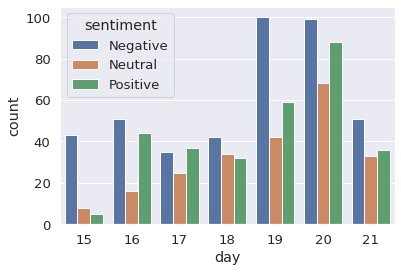

In [156]:
sns.countplot(df['day'],hue = df['sentiment'])

In [157]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [158]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,sentiment,day,sentiment_1
0,2020-11-21 22:34:11,1330278362485493761,False,Pappu Rahul Gandhi and Mother Sonia Gandhi esc...,robbervadra3,India,Twitter for Android,0,16,567,0,"[pappu, rahul, gandhi, mother, sonia, gandhi, ...",Negative,21,0
1,2020-11-21 20:16:15,1330243649146396676,False,"Rajneeti News (4 ‘dissenters’ on Cong panels, ...",RajneetiNews,New Delhi,Rajneeti News,0,553,277,0,"[rajneeti, news, dissent, cong, panel, sibal, ...",Neutral,21,1
2,2020-11-21 19:55:36,1330238452521197570,False,"Rajneeti News (4 ‘dissenters’ on Cong panels, ...",RajneetiNews,New Delhi,Rajneeti News,0,553,277,0,"[rajneeti, news, dissent, cong, panel, sibal, ...",Neutral,21,1
3,2020-11-21 19:19:22,1330229333860954119,False,Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...,JharkhandVikas,Ranchi l New Delhi l Kolkata,Twitter for iPhone,0,901,234,0,"[vote, dene, wala, bhi, hoga, adhir, chowdhari...",Negative,21,0
4,2020-11-21 19:08:04,1330226489279848448,False,@anandPriyank11 @DjKaran @SaketGokhale @rohini...,VM13277460,,Twitter for Android,0,15,56,0,"[serious, rahul, gandhi, even, stay, hous, mot...",Negative,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,2020-11-15 14:06:52,1327976364222205952,False,@ANI If its EVM then how did congress won in P...,iamGAK4,"Mumbai, India",Twitter for iPhone,0,114,153,0,"[evm, congress, punjab, maharastra, aap, delhi]",Neutral,15,1
944,2020-11-15 14:04:40,1327975811446542337,False,Muslims voted for the AAP in this year’s Delhi...,goldenarcher,Animal Farm,Twitter for Android,1,1763,73,0,"[muslim, vote, aap, year, delhi, assembl, elec...",Positive,15,2
945,2020-11-15 13:41:27,1327969968546217984,False,ARSHI EVERY AS RTY HAS THE RIGHT TO FIGHT ELEC...,zubair_sbl,"Maharashtra, India",Twitter for Android,0,1592,1745,0,"[arshi, everi, rti, right, fight, elect, canno...",Negative,15,0
946,2020-11-15 12:58:59,1327959279865712641,False,"@Rahulmi93134482 @Ch_AnilKumarINC Sir, Polluti...",nitinagrawal911,new delhi,Twitter Web App,0,24,39,0,"[sir, pollut, bjp, aap, congress, one, els, li...",Negative,15,0


In [159]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [161]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [162]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [163]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.6982456140350877
Precision Score:  0.6982456140350877
Recall Score:  0.6982456140350877
F1 Score:  0.6982456140350877


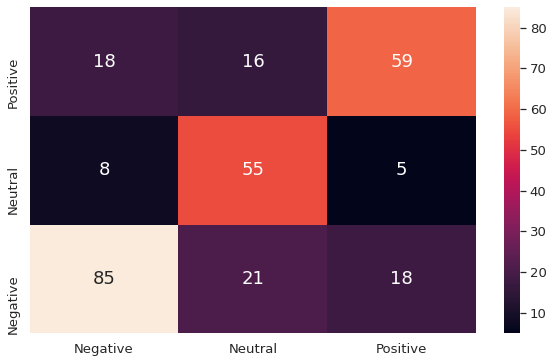

In [164]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [165]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [166]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [167]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5174129353233831
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [168]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.519298245614035
Precision Score:  0.519298245614035
Recall Score:  0.519298245614035
F1 Score:  0.519298245614035


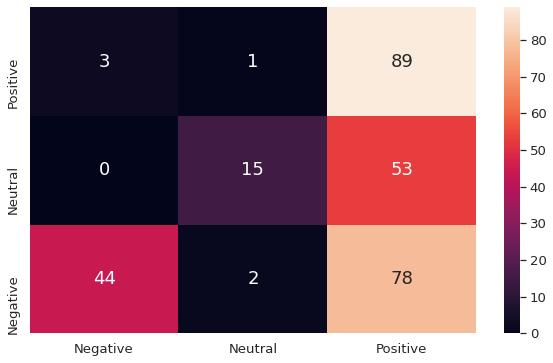

In [169]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [170]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [171]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.6982456140350877
Precision Score:  0.6982456140350877
Recall Score:  0.6982456140350877
F1 Score:  0.6982456140350877


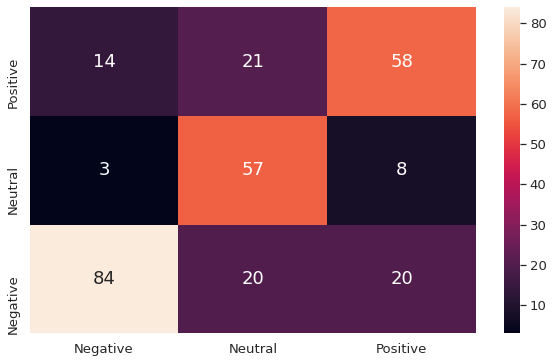

In [172]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [173]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [174]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, max_depth=2, criterion=entropy ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, max_depth=2, criterion=entropy, score=0.451, total=   0.9s
[CV] n_estimators=600, max_depth=2, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=600, max_depth=2, criterion=entropy, score=0.451, total=   0.9s
[CV] n_estimators=600, max_depth=2, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=600, max_depth=2, criterion=entropy, score=0.444, total=   0.9s
[CV] n_estimators=600, max_depth=2, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=600, max_depth=2, criterion=entropy, score=0.462, total=   0.9s
[CV] n_estimators=600, max_depth=2, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=600, max_depth=2, criterion=entropy, score=0.455, total=   0.9s
[CV] n_estimators=100, max_depth=17, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=100, max_depth=17, criterion=gini, score=0.639, total=   0.3s
[CV] n_estimators=100, max_depth=17, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=100, max_depth=17, criterion=gini, score=0.579, total=   0.3s
[CV] n_estimators=100, max_depth=17, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.1s remaining:    0.0s


[CV]  n_estimators=100, max_depth=17, criterion=gini, score=0.677, total=   0.3s
[CV] n_estimators=100, max_depth=17, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.3s remaining:    0.0s


[CV]  n_estimators=100, max_depth=17, criterion=gini, score=0.614, total=   0.3s
[CV] n_estimators=100, max_depth=17, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=100, max_depth=17, criterion=gini, score=0.561, total=   0.3s
[CV] n_estimators=700, max_depth=19, criterion=entropy ...............
[CV]  n_estimators=700, max_depth=19, criterion=entropy, score=0.647, total=   1.8s
[CV] n_estimators=700, max_depth=19, criterion=entropy ...............
[CV]  n_estimators=700, max_depth=19, criterion=entropy, score=0.632, total=   1.8s
[CV] n_estimators=700, max_depth=19, criterion=entropy ...............
[CV]  n_estimators=700, max_depth=19, criterion=entropy, score=0.707, total=   1.8s
[CV] n_estimators=700, max_depth=19, criterion=entropy ...............
[CV]  n_estimators=700, max_depth=19, criterion=entropy, score=0.621, total=   1.8s
[CV] n_estimators=700, max_depth=19, criterion=entropy ...............
[CV]  n_estimators=700, max_depth=19, criterion=entropy, score=0.591, total=   1.8s
[CV] n_estimators=1300, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1300, max_depth=4, criterion=gini, score=0.504, total=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


0.6394167236272499
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 19, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [175]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.6491228070175439
Precision Score:  0.6491228070175439
Recall Score:  0.6491228070175439
F1 Score:  0.6491228070175439


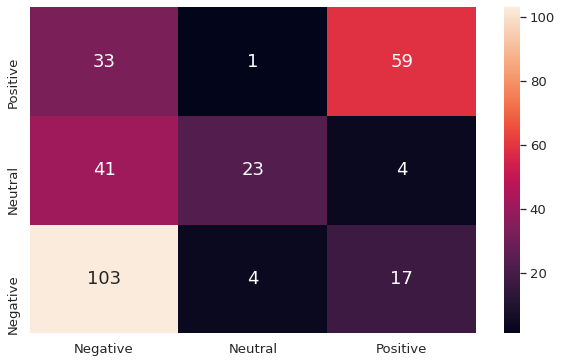

In [176]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [177]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.6491228070175439
Precision Score:  0.6491228070175439
Recall Score:  0.6491228070175439
F1 Score:  0.6491228070175439


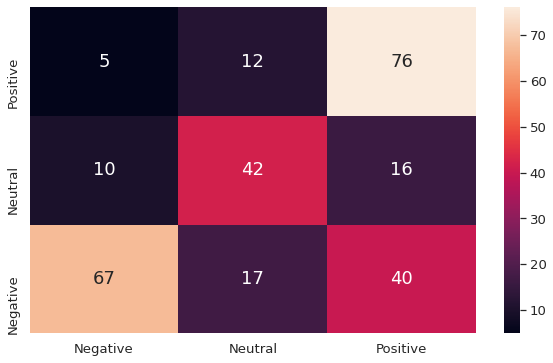

In [178]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [179]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [180]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6455450022614201
{'alpha': 2, 'class_prior': None, 'fit_prior': True}


In [181]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.6035087719298246
Precision Score:  0.6035087719298246
Recall Score:  0.6035087719298246
F1 Score:  0.6035087719298246


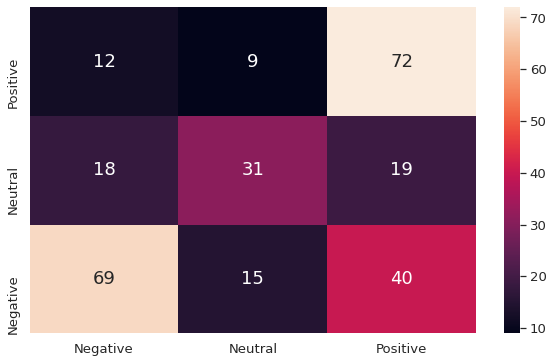

In [182]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

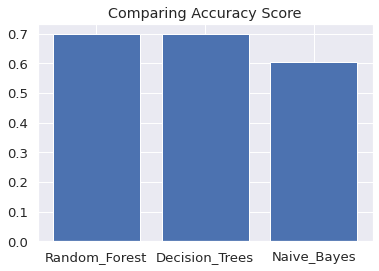

In [183]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

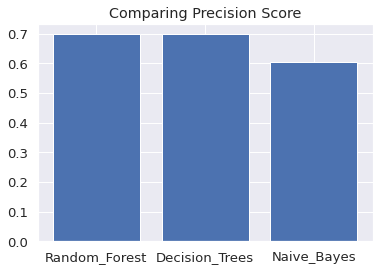

In [184]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

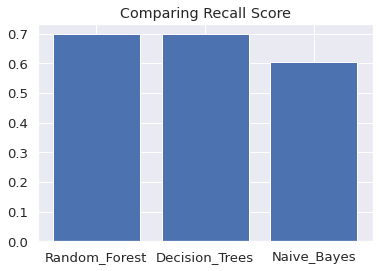

In [185]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

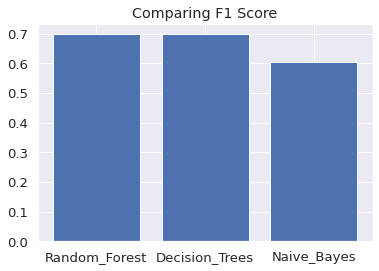

In [186]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()